# 🔥 LighterTracker - Projeto de Data Science Comportamental

#**Bloco 1: Introdução ao LighterTracker**


**LighterTracker** é um sistema inteligente de rastreamento e análise de perdas de objetos pessoais, com foco inicial em **isqueiros**, mas com potencial para expandir para chaves, fones de ouvido, cartões, entre outros itens do cotidiano.

Este projeto foi criado com base em **uma observação pessoal recorrente**: por que as pessoas perdem tanto objetos pequenos e aparentemente banais como isqueiros? A partir dessa pergunta simples, nasceu um sistema completo que analisa **dados comportamentais**, simula perfis de usuários, prevê perdas com base em padrões e oferece **insights práticos** tanto para os usuários quanto para comerciantes.

> 💡 O LighterTracker é um case completo de **Ciência de Dados aplicada**, desenvolvido por **Murilo**, em transição de carreira, utilizando todo o ciclo de vida dos dados — da geração e análise à visualização, predição e apresentação.


#**Bloco 2: Geração de Dados Sintéticos**



##Por que dados sintéticos?


**Objetivo:** Gerar dados realistas para todas as tabelas do schema, respeitando as relações e usando distribuições estatísticas adequadas, para simular o funcionamento do LighterTracker.

  

In [ ]:
# Instalação do Faker

In [3]:
%pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.9 MB/s eta 0:00:00


# Bloco 3: Geração de Dados Sintéticos

In [4]:
# Como o LighterTracker ainda não está em produção, criamos dados fictícios que respeitam o schema do banco.
# Isso nos permite testar o sistema e demonstrar suas funcionalidades no portfólio.
import pandas as pd
import numpy as np
from faker import Faker
import datetime

In [5]:
# Configurar semente para reprodutibilidade
np.random.seed(42)
Faker.seed(42)
fake = Faker('pt_BR')

# Criar diretório para salvar os dados
import os
os.makedirs('/content/lightertrack', exist_ok=True)


## Geração das Tabelas com Dados Sintéticos.
##### O código foi gerado com Inteligência Artificial.

In [6]:

# 1. Tabela Estados (27 registros)
estados = pd.DataFrame({
    'EstadoID': range(1, 28),
    'SiglaEstado': ['SP', 'RJ', 'MG', 'RS', 'BA', 'PR', 'PE', 'CE', 'PA', 'SC', 'MA', 'GO', 'AM', 'ES', 'PB', 'RN', 'AL', 'PI', 'DF', 'MS', 'SE', 'RO', 'TO', 'AC', 'AP', 'RR', 'MT'],
    'NomeEstado': ['São Paulo', 'Rio de Janeiro', 'Minas Gerais', 'Rio Grande do Sul', 'Bahia', 'Paraná', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina', 'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba', 'Rio Grande do Norte', 'Alagoas', 'Piauí', 'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia', 'Tocantins', 'Acre', 'Amapá', 'Roraima', 'Mato Grosso'],
    'Regiao': ['Sudeste', 'Sudeste', 'Sudeste', 'Sul', 'Nordeste', 'Sul', 'Nordeste', 'Nordeste', 'Norte', 'Sul', 'Nordeste', 'Centro-Oeste', 'Norte', 'Sudeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Centro-Oeste', 'Centro-Oeste', 'Nordeste', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Centro-Oeste'],
    'DataCriacao': [datetime.datetime.now()] * 27,
    'DataAtualizacao': [datetime.datetime.now()] * 27
})
estados.to_csv('/content/lightertrack/estados.csv', index=False)

# 2. Tabela Cidades (500 registros)
cidades = pd.DataFrame({
    'CidadeID': range(1, 501),
    'EstadoID': np.random.choice(estados['EstadoID'], size=500),
    'NomeCidade': [fake.city() for _ in range(500)],
    'Populacao': np.random.randint(10000, 5000000, size=500),
    'DataCriacao': [datetime.datetime.now() for _ in range(500)]
})
cidades.to_csv('/content/lightertrack/cidades.csv', index=False)

# 3. Tabela Usuarios (10.000 registros)
n_usuarios = 10000
usuarios = pd.DataFrame({
    'UsuarioID': range(1, n_usuarios + 1),
    'Nome': [fake.name() for _ in range(n_usuarios)],
    'Email': [fake.email() for _ in range(n_usuarios)],
    'Telefone': [fake.phone_number() for _ in range(n_usuarios)],
    'DataNascimento': [fake.date_of_birth(minimum_age=18, maximum_age=80) for _ in range(n_usuarios)],
    'Genero': np.random.choice(['M', 'F', 'O'], size=n_usuarios, p=[0.45, 0.45, 0.1]),
    'CidadeID': np.random.choice(cidades['CidadeID'], size=n_usuarios, p=cidades['Populacao']/cidades['Populacao'].sum()),
    'CEP': [fake.postcode() for _ in range(n_usuarios)],
    'Profissao': [fake.job() for _ in range(n_usuarios)],
    'RendaFamiliar': np.random.lognormal(mean=8, sigma=0.5, size=n_usuarios).round(2),
    'Fumante': np.random.choice([0, 1], size=n_usuarios, p=[0.8, 0.2]),
    'DataCadastro': [fake.date_time_between(start_date='-2y', end_date='now') for _ in range(n_usuarios)],
    'DataUltimaAtualizacao': [fake.date_time_between(start_date='-1y', end_date='now') for _ in range(n_usuarios)],
    'Ativo': [1] * n_usuarios
})
usuarios.to_csv('/content/lightertrack/usuarios.csv', index=False)

# 4. Tabela Marcas (20 registros)
marcas = pd.DataFrame({
    'MarcaID': range(1, 21),
    'NomeMarca': ['Bic', 'Zippo', 'Clipper', 'Cricket', 'Djeep', 'Flamme', 'Luminos', 'Spark', 'Firebird', 'Torch', 'Ignite', 'Blaze', 'Flicker', 'Glow', 'Ember', 'Flint', 'Scorch', 'LightUp', 'Burner', 'Fireside'],
    'PaisOrigem': [fake.country() for _ in range(20)],
    'DataFundacao': [fake.date_between(start_date='-50y', end_date='now') for _ in range(20)],
    'Website': [fake.url() for _ in range(20)],
    'DataCriacao': [datetime.datetime.now()] * 20
})
marcas.to_csv('/content/lightertrack/marcas.csv', index=False)

# 5. Tabela CategoriasIsqueiros (5 registros)
categorias = pd.DataFrame({
    'CategoriaID': range(1, 6),
    'NomeCategoria': ['Descartável', 'Recarregável', 'Premium', 'Decorativo', 'Industrial'],
    'Descricao': ['Isqueiros descartáveis baratos', 'Isqueiros que podem ser recarregados', 'Isqueiros de alta qualidade', 'Isqueiros com design especial', 'Isqueiros para uso industrial'],
    'DataCriacao': [datetime.datetime.now()] * 5
})
categorias.to_csv('/content/lightertrack/categorias_isqueiros.csv', index=False)

# 6. Tabela Isqueiros (100 registros)
isqueiros = pd.DataFrame({
    'IsqueiroID': range(1, 101),
    'MarcaID': np.random.choice(marcas['MarcaID'], size=100),
    'CategoriaID': np.random.choice(categorias['CategoriaID'], size=100),
    'Modelo': [f'Modelo {i}' for i in range(1, 101)],
    'Cor': [fake.color_name() for _ in range(100)],
    'Material': np.random.choice(['Plástico', 'Metal', 'Aço Inoxidável'], size=100),
    'TipoCombustivel': np.random.choice(['Butano', 'Gasolina', 'Outro'], size=100, p=[0.7, 0.2, 0.1]),
    'CapacidadeML': np.random.uniform(5, 50, size=100).round(2),
    'Peso': np.random.uniform(10, 100, size=100).round(2),
    'Dimensoes': [f'{np.random.randint(5, 15)}x{np.random.randint(2, 5)}x{np.random.randint(1, 3)} cm' for _ in range(100)],
    'PrecoSugerido': np.random.uniform(5, 100, size=100).round(2),
    'VidaUtilEstimadaDias': np.random.randint(30, 365, size=100),
    'Descricao': [fake.text(max_nb_chars=200) for _ in range(100)],
    'CodigoBarras': [fake.ean13() for _ in range(100)],
    'DataLancamento': [fake.date_between(start_date='-5y', end_date='now') for _ in range(100)],
    'DataCriacao': [datetime.datetime.now()] * 100,
    'Ativo': [1] * 100
})
isqueiros.to_csv('/content/lightertrack/isqueiros.csv', index=False)

# 7. Tabela TiposEstabelecimento (10 registros)
tipos_estabelecimento = pd.DataFrame({
    'TipoEstabelecimentoID': range(1, 11),
    'NomeTipo': ['Tabacaria', 'Bar', 'Mercado', 'Loja de Conveniência', 'Restaurante', 'Posto de Gasolina', 'Farmácia', 'Supermercado', 'Loja de Presentes', 'Quiosque'],
    'Descricao': [fake.text(max_nb_chars=100) for _ in range(10)],
    'DataCriacao': [datetime.datetime.now()] * 10
})
tipos_estabelecimento.to_csv('/content/lightertrack/tipos_estabelecimento.csv', index=False)

# 8. Tabela Estabelecimentos (1.000 registros)
estabelecimentos = pd.DataFrame({
    'EstabelecimentoID': range(1, 1001),
    'TipoEstabelecimentoID': np.random.choice(tipos_estabelecimento['TipoEstabelecimentoID'], size=1000),
    'CidadeID': np.random.choice(cidades['CidadeID'], size=1000),
    'NomeEstabelecimento': [fake.company() for _ in range(1000)],
    'Endereco': [fake.address() for _ in range(1000)],
    'CEP': [fake.postcode() for _ in range(1000)],
    'Latitude': np.random.uniform(-23.7, -23.4, size=1000),  # Exemplo: coordenadas em SP
    'Longitude': np.random.uniform(-46.8, -46.5, size=1000),
    'Telefone': [fake.phone_number() for _ in range(1000)],
    'HorarioFuncionamento': ['08:00-22:00'] * 1000,
    'DataAbertura': [fake.date_between(start_date='-10y', end_date='now') for _ in range(1000)],
    'DataCriacao': [datetime.datetime.now()] * 1000,
    'Ativo': [1] * 1000
})
estabelecimentos.to_csv('/content/lightertrack/estabelecimentos.csv', index=False)

# 9. Tabela Compras (50.000 registros)
n_compras = 50000
compras = pd.DataFrame({
    'CompraID': range(1, n_compras + 1),
    'UsuarioID': np.random.choice(usuarios['UsuarioID'], size=n_compras),
    'EstabelecimentoID': np.random.choice(estabelecimentos['EstabelecimentoID'], size=n_compras),
    'DataCompra': [fake.date_time_between(start_date='-2y', end_date='now') for _ in range(n_compras)],
    'ValorTotal': [0.0] * n_compras,  # Será calculado após ItensCompra
    'MetodoPagamento': np.random.choice(['PIX', 'Cartão Crédito', 'Dinheiro'], size=n_compras, p=[0.5, 0.3, 0.2]),
    'NumeroNF': [fake.ean8() for _ in range(n_compras)],
    'Observacoes': [fake.text(max_nb_chars=100) for _ in range(n_compras)],
    'DataCriacao': [datetime.datetime.now()] * n_compras
})

# 10. Tabela ItensCompra (60.000 registros)
n_itens = 60000
itens_compra = pd.DataFrame({
    'ItemCompraID': range(1, n_itens + 1),
    'CompraID': np.random.choice(compras['CompraID'], size=n_itens),
    'IsqueiroID': np.random.choice(isqueiros['IsqueiroID'], size=n_itens),
    'Quantidade': np.random.poisson(lam=1.5, size=n_itens).clip(1, 5),
    'PrecoUnitario': np.random.uniform(5, 100, size=n_itens).round(2),
    'Desconto': np.random.uniform(0, 20, size=n_itens).round(2),
    'DataCriacao': [datetime.datetime.now()] * n_itens
})
itens_compra['SubTotal'] = itens_compra['Quantidade'] * itens_compra['PrecoUnitario'] * (1 - itens_compra['Desconto']/100)

# Atualizar ValorTotal em Compras
compras_valor_total = itens_compra.groupby('CompraID')['SubTotal'].sum().reset_index()
compras = compras.merge(compras_valor_total, on='CompraID', how='left').fillna({'SubTotal': 0})
compras['ValorTotal'] = compras['SubTotal']
compras = compras.drop(columns=['SubTotal'])
compras.to_csv('/content/lightertrack/compras.csv', index=False)
itens_compra.to_csv('/content/lightertrack/itens_compra.csv', index=False)

# 11. Tabela IsqueirosUsuario (60.000 registros)
n_isqueiros_usuario = 60000
isqueiros_usuario = pd.DataFrame({
    'IsqueiroUsuarioID': range(1, n_isqueiros_usuario + 1),
    'UsuarioID': np.random.choice(usuarios['UsuarioID'], size=n_isqueiros_usuario),
    'ItemCompraID': np.random.choice(itens_compra['ItemCompraID'], size=n_isqueiros_usuario),
    'NumeroSerie': [fake.ean13() for _ in range(n_isqueiros_usuario)],
    'Apelido': [fake.word() for _ in range(n_isqueiros_usuario)],
    'DataCompra': [compras.loc[compras['CompraID'] == itens_compra.loc[i, 'CompraID'], 'DataCompra'].iloc[0] for i in range(n_isqueiros_usuario)],
    'DataPrimeiroUso': [fake.date_time_between(start_date='-2y', end_date='now') for _ in range(n_isqueiros_usuario)],
    'StatusAtual': np.random.choice(['Novo', 'Em Uso', 'Perdido', 'Quebrado', 'Vazio', 'Descartado'], size=n_isqueiros_usuario, p=[0.1, 0.6, 0.2, 0.05, 0.03, 0.02]),
    'LocalAtual': [fake.address() for _ in range(n_isqueiros_usuario)],
    'DataUltimaLocalizacao': [fake.date_time_between(start_date='-1y', end_date='now') for _ in range(n_isqueiros_usuario)],
    'CombustivelAtual': np.random.uniform(0, 50, size=n_isqueiros_usuario).round(2),
    'DataCriacao': [datetime.datetime.now()] * n_isqueiros_usuario,
    'DataAtualizacao': [datetime.datetime.now()] * n_isqueiros_usuario
})
isqueiros_usuario.to_csv('/content/lightertrack/isqueiros_usuario.csv', index=False)

# 12. Tabela Locais (1.000 registros)
locais = pd.DataFrame({
    'LocalID': range(1, 1001),
    'NomeLocal': [fake.company() for _ in range(1000)],
    'TipoLocal': np.random.choice(['Casa', 'Bar', 'Trabalho', 'Restaurante', 'Outro'], size=1000),
    'Endereco': [fake.address() for _ in range(1000)],
    'Latitude': np.random.uniform(-23.7, -23.4, size=1000),
    'Longitude': np.random.uniform(-46.8, -46.5, size=1000),
    'Descricao': [fake.text(max_nb_chars=200) for _ in range(1000)],
    'DataCriacao': [datetime.datetime.now()] * 1000
})
locais.to_csv('/content/lightertrack/locais.csv', index=False)

# 13. Tabela Utilizacao (100.000 registros)
n_utilizacao = 100000
utilizacao = pd.DataFrame({
    'UtilizacaoID': range(1, n_utilizacao + 1),
    'IsqueiroUsuarioID': np.random.choice(isqueiros_usuario['IsqueiroUsuarioID'], size=n_utilizacao),
    'LocalID': np.random.choice(locais['LocalID'], size=n_utilizacao),
    'DataHoraUso': [fake.date_time_between(start_date='-2y', end_date='now') for _ in range(n_utilizacao)],
    'TipoUso': np.random.choice(['Cigarro', 'Vela', 'Churrasco', 'Outro'], size=n_utilizacao, p=[0.5, 0.2, 0.2, 0.1]),
    'DuracaoUsoSegundos': np.random.normal(loc=5, scale=2, size=n_utilizacao).clip(1, 30).astype(int),
    'ConsumoEstimadoML': np.random.normal(loc=0.05, scale=0.02, size=n_utilizacao).clip(0, 0.1).round(3),
    'Temperatura': np.random.normal(loc=25, scale=5, size=n_utilizacao).round(2),
    'UmidadeAr': np.random.uniform(30, 90, size=n_utilizacao).round(2),
    'Observacoes': [fake.text(max_nb_chars=100) for _ in range(n_utilizacao)],
    'Latitude': np.random.uniform(-23.7, -23.4, size=n_utilizacao),
    'Longitude': np.random.uniform(-46.8, -46.5, size=n_utilizacao),
    'DataCriacao': [datetime.datetime.now()] * n_utilizacao
})
utilizacao.to_csv('/content/lightertrack/utilizacao.csv', index=False)

# 14. Tabela HistoricoLocalizacao (20.000 registros)
n_historico = 20000
historico_localizacao = pd.DataFrame({
    'HistoricoID': range(1, n_historico + 1),
    'IsqueiroUsuarioID': np.random.choice(isqueiros_usuario['IsqueiroUsuarioID'], size=n_historico),
    'LocalID': np.random.choice(locais['LocalID'], size=n_historico),
    'DataHoraRegistro': [fake.date_time_between(start_date='-2y', end_date='now') for _ in range(n_historico)],
    'TipoEvento': np.random.choice(['Guardado', 'Encontrado', 'Perdido', 'Movido'], size=n_historico, p=[0.3, 0.2, 0.3, 0.2]),
    'Latitude': np.random.uniform(-23.7, -23.4, size=n_historico),
    'Longitude': np.random.uniform(-46.8, -46.5, size=n_historico),
    'Descricao': [fake.text(max_nb_chars=200) for _ in range(n_historico)],
    'ConfiabilidadeLocalizacao': np.random.uniform(0, 1, size=n_historico).round(2),
    'DataCriacao': [datetime.datetime.now()] * n_historico
})
historico_localizacao.to_csv('/content/lightertrack/historico_localizacao.csv', index=False)

# 15. Tabela Manutencao (5.000 registros)
n_manutencao = 5000
manutencao = pd.DataFrame({
    'ManutencaoID': range(1, n_manutencao + 1),
    'IsqueiroUsuarioID': np.random.choice(isqueiros_usuario['IsqueiroUsuarioID'], size=n_manutencao),
    'TipoManutencao': np.random.choice(['Recarga', 'Troca Pedra', 'Reparo', 'Limpeza'], size=n_manutencao, p=[0.7, 0.1, 0.1, 0.1]),
    'DataManutencao': [fake.date_time_between(start_date='-2y', end_date='now') for _ in range(n_manutencao)],
    'Custo': np.random.normal(loc=10, scale=5, size=n_manutencao).clip(0, 50).round(2),
    'EstabelecimentoID': np.random.choice(estabelecimentos['EstabelecimentoID'], size=n_manutencao),
    'Observacoes': [fake.text(max_nb_chars=100) for _ in range(n_manutencao)],
    'DataCriacao': [datetime.datetime.now()] * n_manutencao
})
manutencao.to_csv('/content/lightertrack/manutencao.csv', index=False)

print("Dados sintéticos gerados e salvos em '/content/lightertrack/'")
print("Exemplo: Primeiros 5 registros da tabela Usuarios")
print(usuarios.head())

Dados sintéticos gerados e salvos em '/content/lightertrack/'
Exemplo: Primeiros 5 registros da tabela Usuarios
   UsuarioID                 Nome                        Email  \
0          1    Gabrielly Azevedo        heloisa62@example.com   
1          2      Giovanna Pastor         ucostela@example.org   
2          3          Igor Farias    da-rochahenry@example.org   
3          4    Alexandre da Mota            xleao@example.org   
4          5  Davi Lucca Nogueira  luiz-fernando15@example.org   

              Telefone DataNascimento Genero  CidadeID        CEP  \
0      (081) 8790 5073     2002-04-18      F       330   66206324   
1  +55 (061) 9072 9485     1953-11-08      F       189  34157-517   
2         51 3666 7313     1951-04-05      M       179  69233-067   
3        0500-628-6338     1960-12-16      F       218   71407724   
4        0500 754 7011     1989-09-28      M        86  84084-945   

                    Profissao  RendaFamiliar  Fumante  \
0                  


## Modelagem de Dados
### **1. Hierarquia Geográfica**

-   **Estados** → **Cidades** (1:N)
-   **Cidades** → **Usuários** (1:N)
-   **Cidades** → **Estabelecimentos** (1:N)

### **2. Catálogo de Produtos**

-   **Marcas** → **Isqueiros** (1:N)
-   **Categorias** → **Isqueiros** (1:N)

### **3. Transações Comerciais**

-   **Usuários** → **Compras** (1:N)
-   **Estabelecimentos** → **Compras** (1:N)
-   **Compras** → **ItensCompra** (1:N)
-   **Isqueiros** → **ItensCompra** (1:N)

### **4. Ciclo de Vida do Produto**

-   **ItensCompra** → **IsqueirosUsuario** (1:N)
-   **Usuários** → **IsqueirosUsuario** (1:N)
-   **IsqueirosUsuario** → **Utilização** (1:N)
-   **IsqueirosUsuario** → **HistóricoLocalização** (1:N)
-   **IsqueirosUsuario** → **Manutenção** (1:N)

### **5. Contexto Espacial**

-   **Locais** → **Utilização** (1:N)
-   **Locais** → **HistóricoLocalização** (1:N)

#**Bloco 3: Validação dos Dados**



**Objetivo**: Verificar a consistência dos dados sintéticos e apresentar visualizações iniciais para confirmar que são realistas e úteis.



In [ ]:
# Bloco 4: Validação dos Dados

import matplotlib.pyplot as plt
import seaborn as sns

# Checar valores nulos
print("Valores nulos por tabela:")
for table, df in [('Usuarios', usuarios), ('Compras', compras), ('Utilizacao', utilizacao)]:
    print(f"{table}:")
    print(df.isnull().sum())
    print()

# Validar chaves estrangeiras
print("Validando chaves estrangeiras...")
print(f"UsuarioID em Compras existe em Usuarios: {compras['UsuarioID'].isin(usuarios['UsuarioID']).all()}")
print(f"IsqueiroUsuarioID em Utilizacao existe em IsqueirosUsuario: {utilizacao['IsqueiroUsuarioID'].isin(isqueiros_usuario['IsqueiroUsuarioID']).all()}")

# Calcular idade
usuarios['Idade'] = [2025 - dob.year for dob in usuarios['DataNascimento']]

Valores nulos por tabela:
Usuarios:
UsuarioID                0
Nome                     0
Email                    0
Telefone                 0
DataNascimento           0
Genero                   0
CidadeID                 0
CEP                      0
Profissao                0
RendaFamiliar            0
Fumante                  0
DataCadastro             0
DataUltimaAtualizacao    0
Ativo                    0
Idade                    0
dtype: int64

Compras:
CompraID             0
UsuarioID            0
EstabelecimentoID    0
DataCompra           0
ValorTotal           0
MetodoPagamento      0
NumeroNF             0
Observacoes          0
DataCriacao          0
dtype: int64

Utilizacao:
UtilizacaoID          0
IsqueiroUsuarioID     0
LocalID               0
DataHoraUso           0
TipoUso               0
DuracaoUsoSegundos    0
ConsumoEstimadoML     0
Temperatura           0
UmidadeAr             0
Observacoes           0
Latitude              0
Longitude             0
DataCriacao    

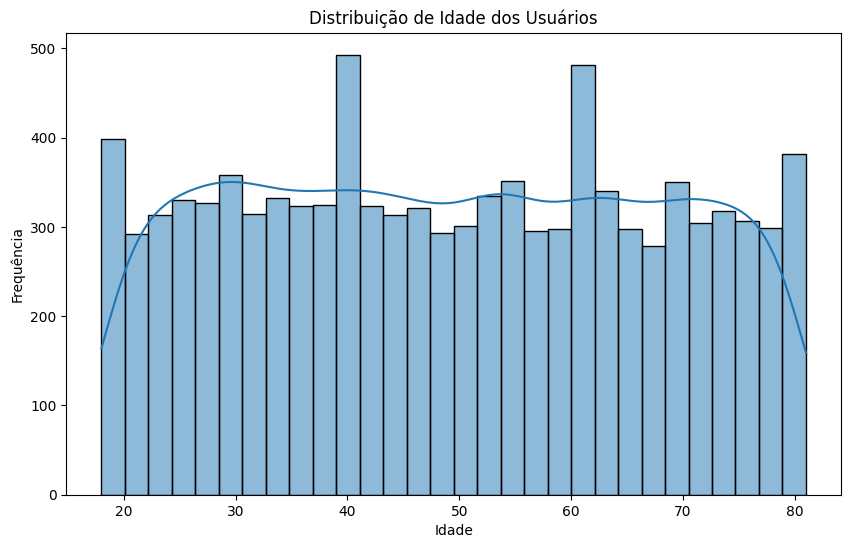

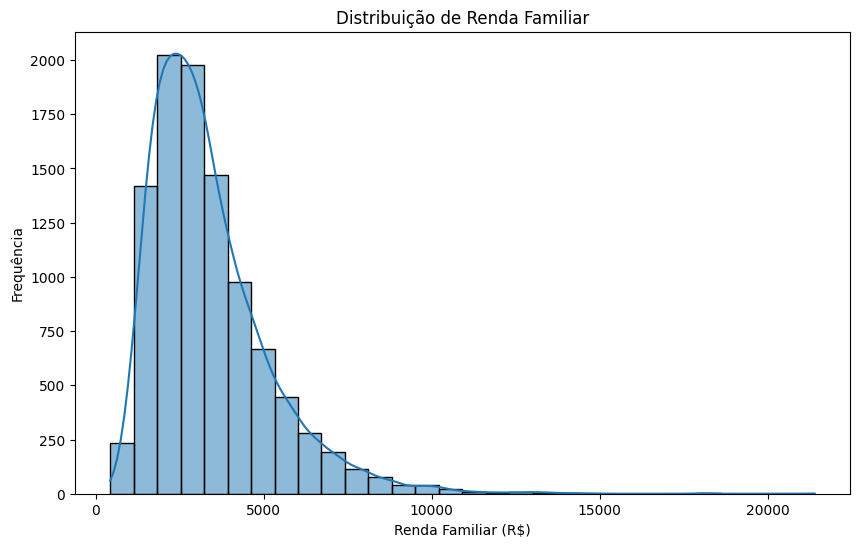

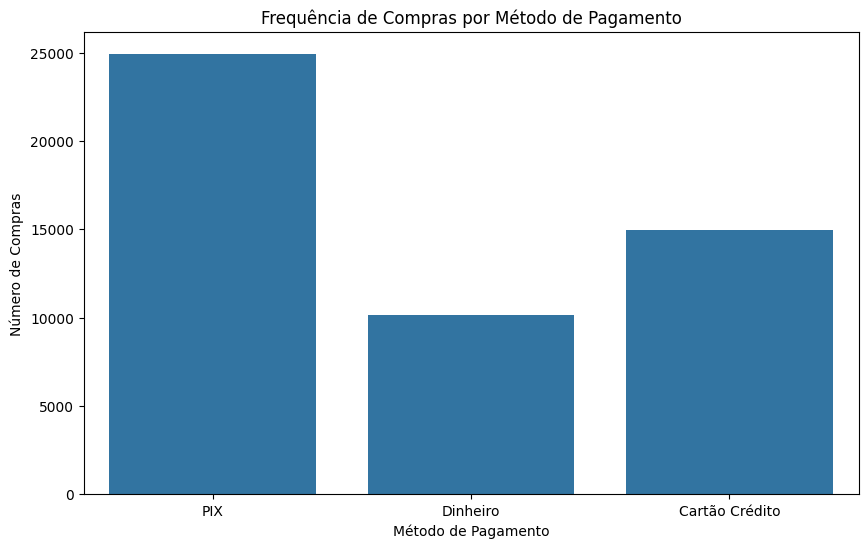

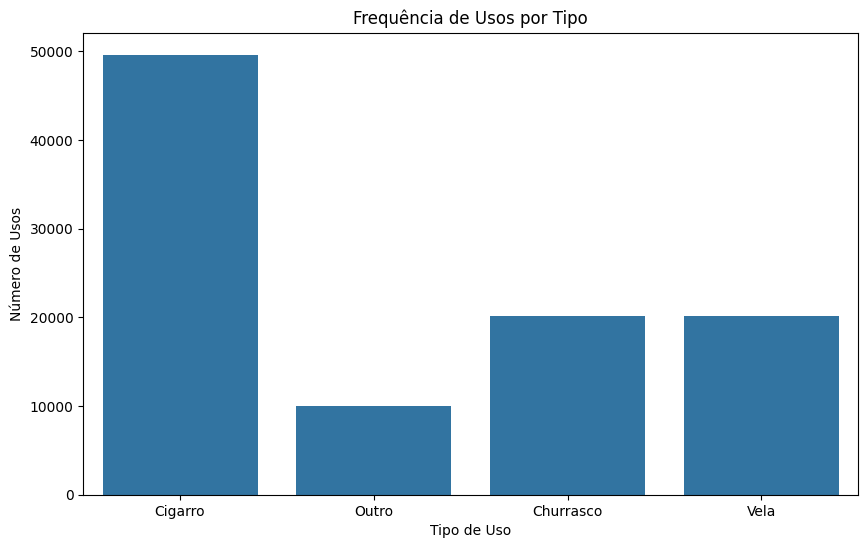

Resumo estatístico:
Idade dos Usuários:
count    10000.000000
mean        49.231500
std         18.116609
min         18.000000
25%         33.000000
50%         49.000000
75%         65.000000
max         81.000000
Name: Idade, dtype: float64

Renda Familiar:
count    10000.000000
mean      3374.165980
std       1768.553991
min        433.470000
25%       2126.030000
50%       2995.180000
75%       4175.650000
max      21400.410000
Name: RendaFamiliar, dtype: float64

Valor Total das Compras:
count    50000.000000
mean        97.477593
std        115.540856
min          0.000000
25%          0.000000
50%         62.449257
75%        150.355196
max        998.619516
Name: ValorTotal, dtype: float64


In [ ]:


# Visualização 1: Histograma de Idade
plt.figure(figsize=(10, 6))
sns.histplot(usuarios['Idade'], bins=30, kde=True)
plt.title('Distribuição de Idade dos Usuários')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Visualização 2: Histograma de Renda
plt.figure(figsize=(10, 6))
sns.histplot(usuarios['RendaFamiliar'], bins=30, kde=True)
plt.title('Distribuição de Renda Familiar')
plt.xlabel('Renda Familiar (R$)')
plt.ylabel('Frequência')
plt.show()

# Visualização 3: Compras por Método de Pagamento
plt.figure(figsize=(10, 6))
sns.countplot(data=compras, x='MetodoPagamento')
plt.title('Frequência de Compras por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Compras')
plt.show()

# Visualização 4: Usos por Tipo
plt.figure(figsize=(10, 6))
sns.countplot(data=utilizacao, x='TipoUso')
plt.title('Frequência de Usos por Tipo')
plt.xlabel('Tipo de Uso')
plt.ylabel('Número de Usos')
plt.show()

# Resumo estatístico
print("Resumo estatístico:")
print("Idade dos Usuários:")
print(usuarios['Idade'].describe())
print("\nRenda Familiar:")
print(usuarios['RendaFamiliar'].describe())
print("\nValor Total das Compras:")
print(compras['ValorTotal'].describe())

#**Bloco 4: Conclusão**




Apresentamos o LighterTracker e seu banco de dados relacional.

Geramos dados sintéticos para 10.000 usuários, 50.000 compras, 100.000 eventos de uso, etc.

In [ ]:
# Bloco 5: Conclusão
# Listar arquivos exportados
print("Arquivos exportados em '/content/lightertrack':")
for file in os.listdir('/content/lightertrack'):
    print(file)



Arquivos exportados em '/content/lightertrack':
usuarios.csv
estabelecimentos.csv
isqueiros.csv
tipos_estabelecimento.csv
compras.csv
historico_localizacao.csv
isqueiros_usuario.csv
estados.csv
cidades.csv
locais.csv
utilizacao.csv
manutencao.csv
itens_compra.csv
marcas.csv
categorias_isqueiros.csv


#**Bloco 5: Salvando as bases**

In [ ]:
import shutil
from google.colab import files

# Compactar o diretório lightertrack em um arquivo ZIP
shutil.make_archive('/content/lightertrack', 'zip', '/content/lightertrack')
print("Diretório compactado como 'lightertrack.zip'")

# Baixar o arquivo ZIP
files.download('/content/lightertrack.zip')

Diretório compactado como 'lightertrack.zip'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Projeto desenvolvido por Murilo Souza, Cientista de Dados em Transição.
Este notebook é um projeto experimental e os dados aqui representados são fictícios e não reprensetam nenhuma empresa/instituição.

Todos os direitos reservados a Murilo Souza Izaias.